reference: https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model

## Title: Sentiment Analysis in Social Media Text using Neural Network <a class="anchor" id="intro"></a>

#### Description:

[Prasad Patil](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Table of Content

* [Introduction](#intro)
    * [Environment Set-up](#setup)
    * [Load dataset](#load_dataset)
    * [Remove possible empty comment(s)](#remove_empty)
* [Sentiment Classes in Dataset](#classes)
* [Top 10 Most Used Words](#top_10)
	* [Top 10 Most Used Words Before Pre-Process](#top_10_ori)
	* [Top 10 Most Used Words After Pre-Process](#top_10_after)
* [Top 15 Most Used Positive Words with Word Counts](#top_15_pos)
* [Top 15 Most Used Negative Words with Word Counts](#top_15_neg)
* [Top 15 Most Used Neutral Words with Word Counts](#top_15_neu)
* [Top Most Used Neutral Words with TreeMap](#neu_treemap)
* [Top Most Used Negative Words with TreeMap](#neg_treemap)
* [Top Most Used Positive Words with TreeMap](#pos_treemap)
* [Top 10 Most Used Positive Words with DoNut Plot](#pos_donut)
* [Top 10 Most Used Negative Words with DoNut Plot](#neg_donut)
* [Top 10 Most Used Neutral Words with DoNut Plot](#neu_donut)
* [WordCloud](#wordcloud)
	* [Negative WordCloud Before Pre-Process](#neg_wordcloud_before)
	* [Negative WordCloud After Pre-Process](#neg_wordcloud_after)
	* [Positive WordCloud Before Pre-Process](#pos_wordcloud_before)
	* [Positive WordCloud After Pre-Process](#neg_wordcloud_after)
	* [WordCloud Before Pre-Process](#wordcloud_before)
	* [WordCloud After Pre-Process](#wordcloud_after)
* [Word Lengths in Three Classes](#word_length)
* [Kernel Density Estimates (KDEs)](#kde)

#### Set-up Environment <a class="anchor" id="setup"></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from palettable.colorbrewer.qualitative import Pastel1_7
from plotly import graph_objs as go
from wordcloud import WordCloud


%matplotlib inline

#### Load dataset <a class="anchor" id="load_dataset"></a>

In [2]:
texts = pd.read_csv('../dataset/facebook_health_cases (all).csv')
df = pd.DataFrame(texts)
df.shape

(7907, 7)

#### Remove possible empty comment(s) <a class="anchor" id="remove_empty"></a>

In [3]:
# remove possible empty text cell
print("before cleaned: ", df.shape)
df['check_stop'].replace('', np.nan, inplace=True)
df = df.dropna()
df = df.reset_index(drop=True)
print("After: ", df.shape)

before cleaned:  (7907, 7)
After:  (7905, 7)


Remove negations and others words that does not help with EDA plot

In [4]:
remove = ['masa', 'jadi', 'ikut', 'tanpa', 'adakah', 'belum', 'sampai', 'walaupun', 'bukan', 'bila', 'boleh', 'not',
         'tapi', 'no', 'kalau', 'mungkin', 'hanya', 'bulan', 'digunakan', 'betul', 'ke', 'tidak', 'tak', 'pkp', 'covid',
         'negeri', 'jangan', 'kena', 'buka', 'malaysia', 'duduk', 'rakyat', 'turun']

Remove words

In [5]:
df['check_stop'] = df['check_stop'].apply(lambda x: ' '.join([item for item in x.split() if item not in remove]))

In [6]:
df.head()

date                                               text sentiment  \
0  20210221  #dsnr salam dato.. lebih kurang 15km dari ruma...  negative   
1  20210204  #noorhishamabdullah you’re not dr.fauci materi...  negative   
2  20210130  #share dan #like page #the_information_news un...   neutral   
3  20210202  1 dunia sedang & terus diperbodohkan dgn agend...  negative   
4  20210206  1 hari sy harap angka nie turun single digit m...  positive   

                                           processed  \
0  salam dato lebih kurang  km dari rumah ke kila...   
1  you re not dr fauci material you re just pn gr...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan dgn ...   
4  satu hari sy harap angka nie turun single digi...   

                                          normalized  \
0  salam dato lebih kurang km dari rumah ke kilan...   
1  you re not dr fauci material you re just pun g...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan deng...   
4  satu hari sy harap angka ini turun single digi...   

                                               check  \
0  salam dato lebih kurang kkm dari rumah ke kila...   
1  you re not dr fauci material you re just pun g...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan deng...   
4  satu hari sy harap angka ini turun single digi...   

                                          check_stop  
0  kurang kkm rumah kilang pkb pkpp kes pengurusa...  
1                        fauci material grabmart boy  
2  page khabar berita saudara patani selatan thai...  
3  dunia diperbodohkan agenda yahudi ekonomi duni...  
4  harap angka single digit capai zero case doaka...

### Sentiment Classes in Dataset  <a class="anchor" id="classes"></a>

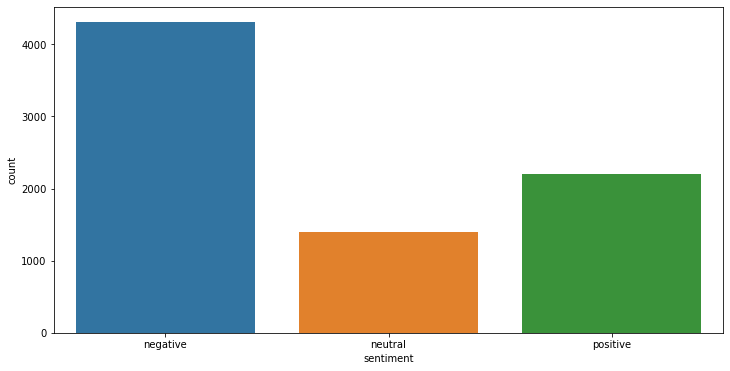

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [8]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    marker = {"colors": ["red", "green", "blue"]},
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

To understand the dataset, first things to look into is the classes of dataset. In this dataset, the proportion of negative classes is highest amongst all, which is 54.4% (4298) of all samples. While positive class has 27.8% (2199) samples followed by neutral with 17.8% (1408). 

### Top 10 Most Used Words  <a class="anchor" id="top_10"></a>

In [9]:
from collections import Counter

def counter(text):
    cnt = Counter()
    for sample in text:
        for text in sample.split():
            cnt[text] += 1
    return cnt

#### Top 10 Most Used Words Before Pre-Process  <a class="anchor" id="top_10_ori"></a>

Text(0.5, 1.0, 'Top 10 Most Frequently Used Words Before Pre-processing')

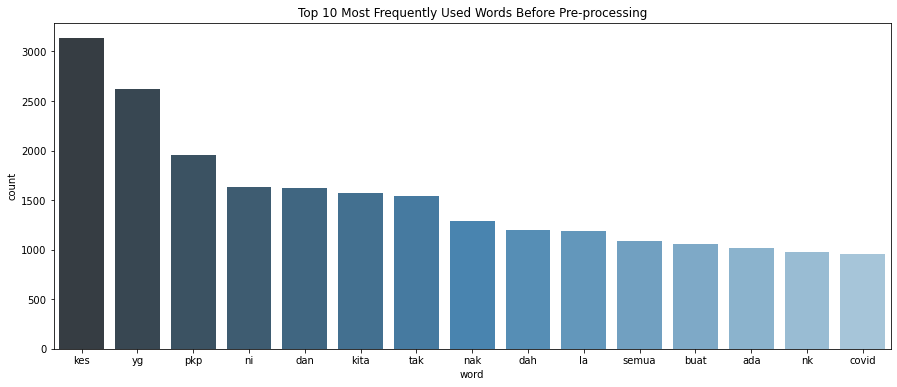

In [10]:
text_count = counter(df['text'])

common_words_b4_preprocess = text_count.most_common(15)
common_words_b4_preprocess = pd.DataFrame(common_words_b4_preprocess, columns=['word', 'count'])
plt.figure(figsize=(15,6))
sns.barplot("word", "count", data=common_words_b4_preprocess, palette="Blues_d").set_title("Top 10 Most Frequently Used Words Before Pre-processing")

#### Top 10 Most Used Words After Pre-Processed  <a class="anchor" id="top_10_after"></a>

Text(0.5, 1.0, 'Top 10 Most Frequently Used Words After Pre-processing')

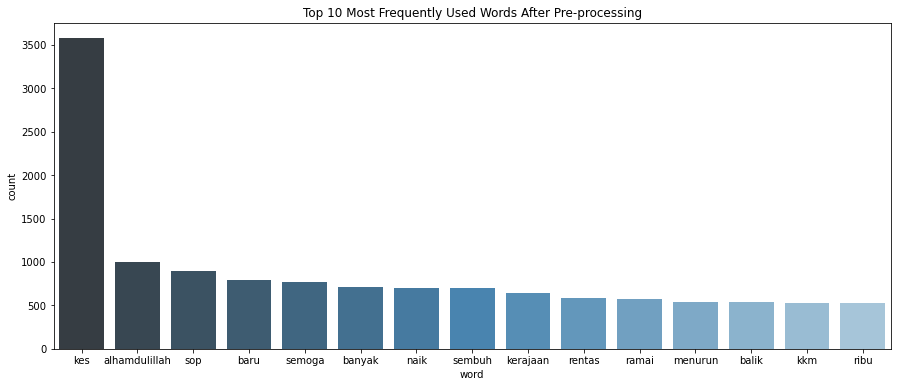

In [11]:
text_count = counter(df['check_stop'])

common_words_b4_preprocess = text_count.most_common(15)
common_words_b4_preprocess = pd.DataFrame(common_words_b4_preprocess, columns=['word', 'count'])
plt.figure(figsize=(15,6))
sns.barplot("word", "count", data=common_words_b4_preprocess, palette="Blues_d").set_title("Top 10 Most Frequently Used Words After Pre-processing")

### Top 15 Most Used Positive Words with Word Counts  <a class="anchor" id="top_15_pos"></a>

In [12]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

In [13]:
temp_df_pos = pd.DataFrame()
temp_df_pos['temp_list'] = Positive_sent['check_stop'].apply(lambda x :str(x).split())
top = Counter([item for sublist in temp_df_pos['temp_list'] for item in sublist])
temp_pos = pd.DataFrame(top.most_common(15))
temp_pos.columns = ['Common Words', 'Count']
temp_pos.style.background_gradient(cmap='Greens')

### Top 15 Most Used Negative Words with Word Counts  <a class="anchor" id="top_15_neg"></a>

In [14]:
temp_df_neg = pd.DataFrame()
temp_df_neg['temp_list'] = Negative_sent['check_stop'].apply(lambda x :str(x).split())
top = Counter([item for sublist in temp_df_neg['temp_list'] for item in sublist])
temp_neg = pd.DataFrame(top.most_common(15))
temp_neg.columns = ['Common Words', 'Count']
temp_neg.style.background_gradient(cmap='Reds')

### Top 15 Most Used Neutral Words with Word Counts  <a class="anchor" id="top_15_neu"></a>

In [15]:
temp_df_neu = pd.DataFrame()
temp_df_neu['temp_list'] = Neutral_sent['check_stop'].apply(lambda x :str(x).split())
top = Counter([item for sublist in temp_df_neu['temp_list'] for item in sublist])
temp_neu = pd.DataFrame(top.most_common(15))
temp_neu.columns = ['Common Words', 'Count']
temp_neu.style.background_gradient(cmap='Blues')

### Top Most Used Neutral Words with TreeMap <a class="anchor" id="neu_treemap"></a>

In [16]:
fig = px.treemap(temp_neu, path=['Common Words'], values='Count',title='Tree Of Most Common Neutral Words')
fig.show()

### Top Most Used Negative Words with TreeMap <a class="anchor" id="neg_treemap"></a>

In [19]:
fig = px.treemap(temp_neg, path=['Common Words'], values='Count',title='Tree Of Most Common Negative Words')
fig.show()

### Top Most Used Positive Words with TreeMap <a class="anchor" id="pos_treemap"></a>

In [20]:
fig = px.treemap(temp_pos, path=['Common Words'], values='Count',title='Tree Of Most Common Positive Words')
fig.show()

### Top 10 Most Used Positive Words with DoNut Plot <a class="anchor" id="pos_donut"></a>

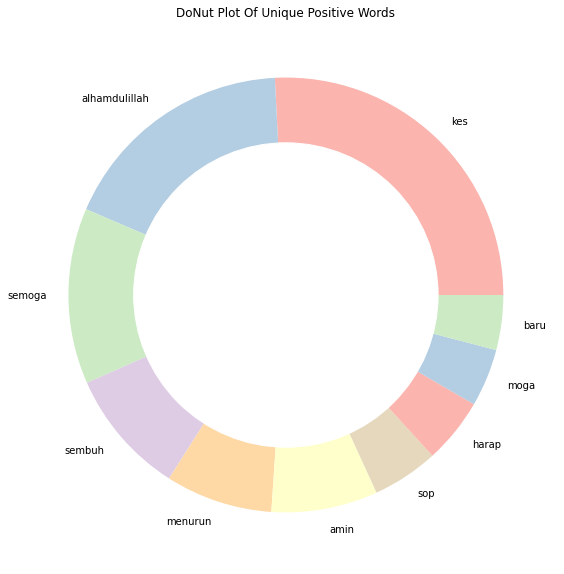

In [21]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_pos['Count'][:10], labels=temp_pos['Common Words'][:10], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### Top 10 Most Used Negative Words with DoNut Plot <a class="anchor" id="neg_donut"></a>

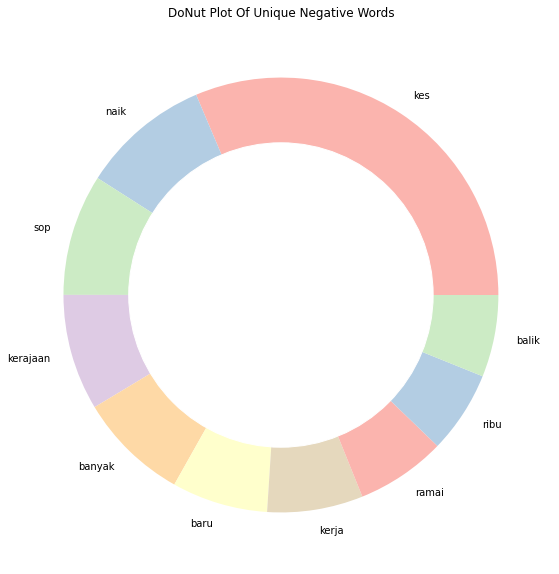

In [22]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_neg['Count'][:10], labels=temp_neg['Common Words'][:10], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

### Top 10 Most Used Neutral Words with DoNut Plot <a class="anchor" id="neu_donut"></a>

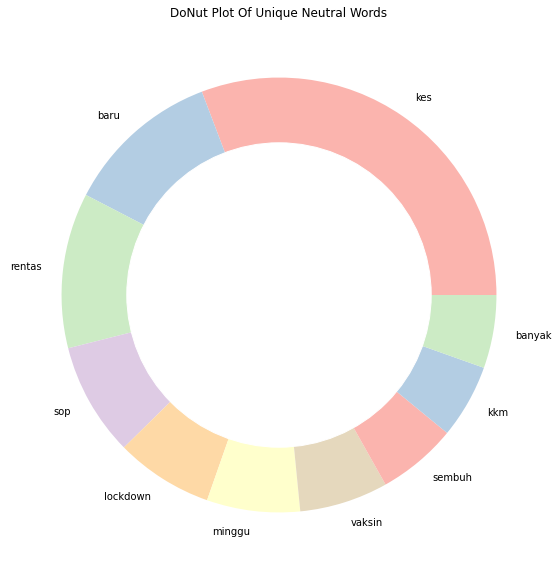

In [23]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_neu['Count'][:10], labels=temp_neu['Common Words'][:10], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

### WordCloud <a class="anchor" id="wordcloud"></a>

[bootslabs](https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/):

> A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

#### Negative WordCloud Before Pre-Process <a class="anchor" id="neg_wordcloud_before"></a>

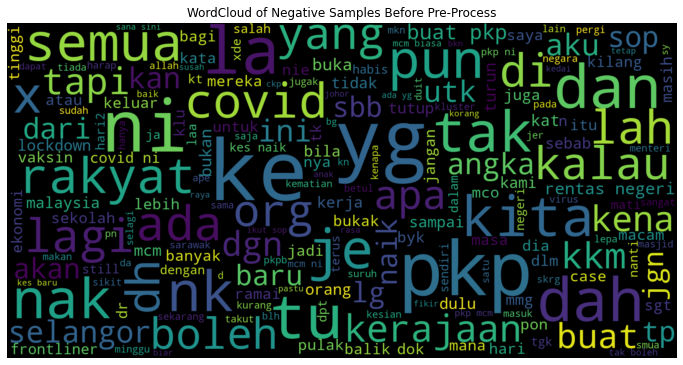

In [24]:
neg_samples = df[df.sentiment == 'negative']
neg_string = []
for t in neg_samples.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.title("WordCloud of Negative Samples Before Pre-Process")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Negative WordCloud After Pre-Process <a class="anchor" id="neg_wordcloud_after"></a>

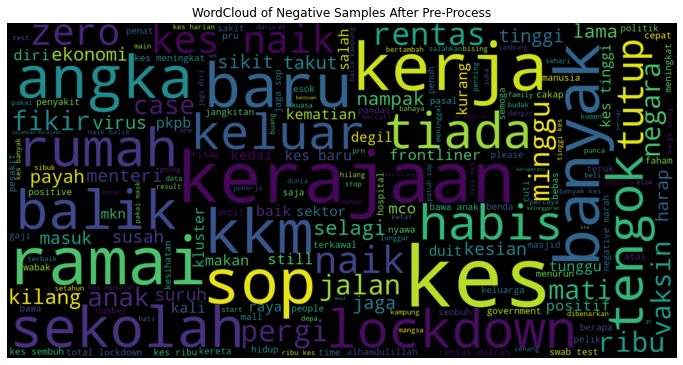

In [25]:
neg_samples = df[df.sentiment == 'negative']
neg_string = []
for t in neg_samples.check_stop:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.title("WordCloud of Negative Samples After Pre-Process")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Positive WordCloud Before Pre-Process <a class="anchor" id="pos_wordcloud_before"></a>

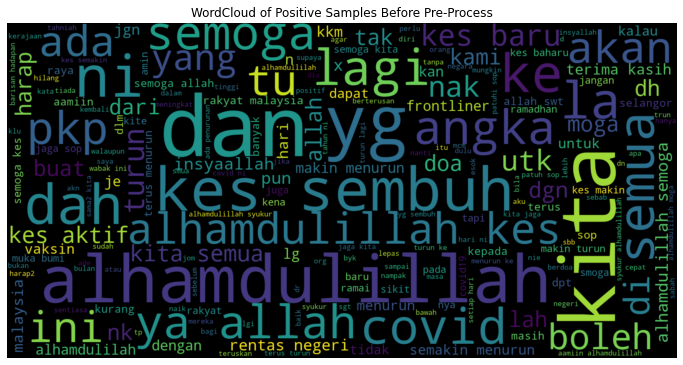

In [26]:
neg_samples = df[df.sentiment == 'positive']
neg_string = []
for t in neg_samples.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.title("WordCloud of Positive Samples Before Pre-Process")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Positive WordCloud After Pre-Process <a class="anchor" id="pos_wordcloud_after"></a>

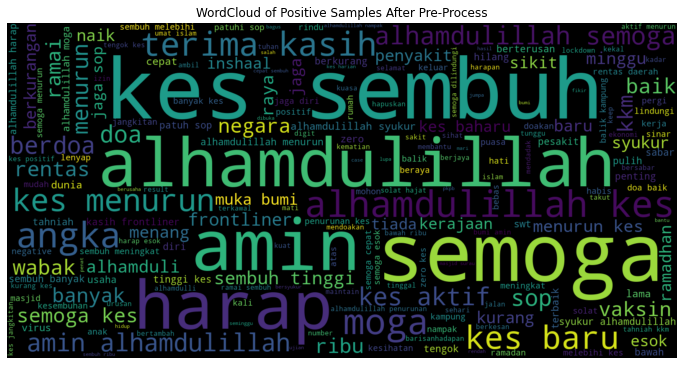

In [27]:
neg_samples = df[df.sentiment == 'positive']
neg_string = []
for t in neg_samples.check_stop:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.title("WordCloud of Positive Samples After Pre-Process")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### WordCloud After Pre-Process <a class="anchor" id="wordcloud_after"></a>

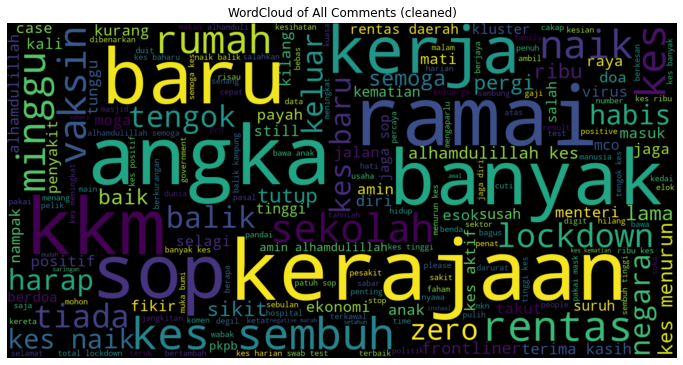

In [51]:
neg_string = []
for t in df.check_stop:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.title("WordCloud of All Comments (cleaned)")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### WordCloud Before Pre-Process <a class="anchor" id="wordcloud_before"></a>

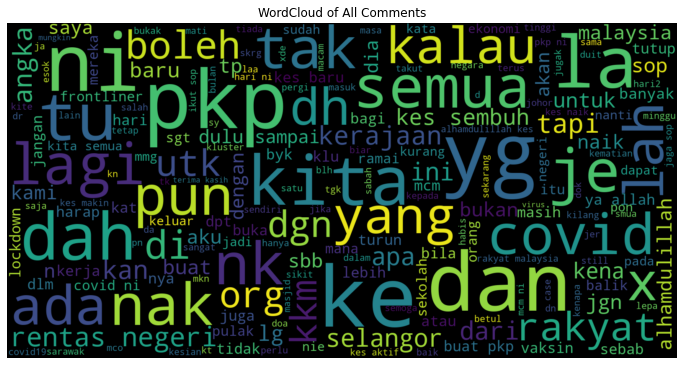

In [50]:
neg_string = []
for t in df.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.title("WordCloud of All Comments")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
negative_reviews = df[df['sentiment']==0]
neutral_reviews = df[df['sentiment']==1]
positive_reviews = df[df['sentiment']==2]


positive_reviews_only = positive_reviews['text']
negative_reviews_only = negative_reviews['text']
neutral_reviews_only = neutral_reviews['text']


#Let's check the most occured word in both positive and negative reviews
top_ten_positive_words = Counter(''.join(positive_reviews_only).split()).most_common(15)
top_ten_negative_words = Counter(''.join(negative_reviews_only).split()).most_common(15)
top_ten_neutral_words = Counter(''.join(neutral_reviews_only).split()).most_common(15)

### Word Lengths in Three Classes <a class="anchor" id="word_length"></a>

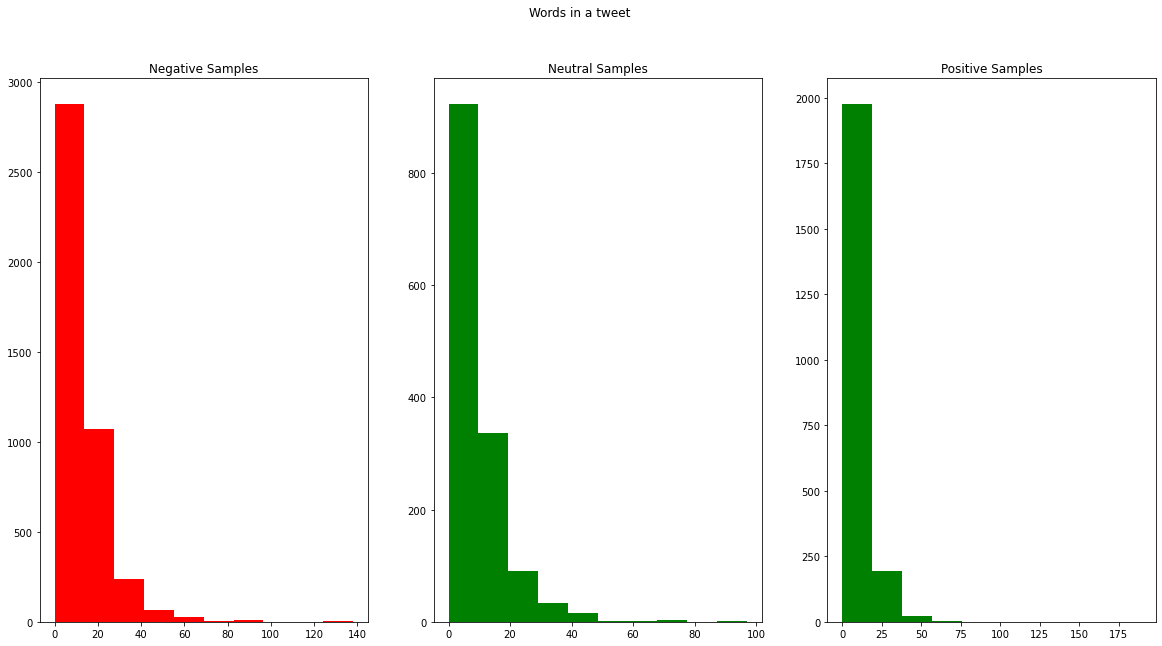

In [31]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
tweet_len=df[df['sentiment']=='negative']['check_stop'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Negative Samples')
tweet_len=df[df['sentiment']=='neutral']['check_stop'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Neutral Samples')
tweet_len=df[df['sentiment']=='positive']['check_stop'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='green')
ax3.set_title('Positive Samples')
fig.suptitle('Words in a tweet')
plt.show()

### Kernel Density Estimates (KDEs) <a class="anchor" id="kde"></a>

[Matthew Conlen](https://mathisonian.github.io/kde/):
> This can be useful if you want to visualize just the “shape” of some data, as a kind of **continuous replacement for the discrete histogram**. It can also be used to generate points that look like they came from a certain dataset - this behavior can power simple simulations, where simulated objects are modeled off of real data.

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning:

Mean of empty slice.

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning:

Mean of empty slice.

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning:

Mean of empty slice.

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars



Text(0.5, 0.98, 'Average word length in each comment')

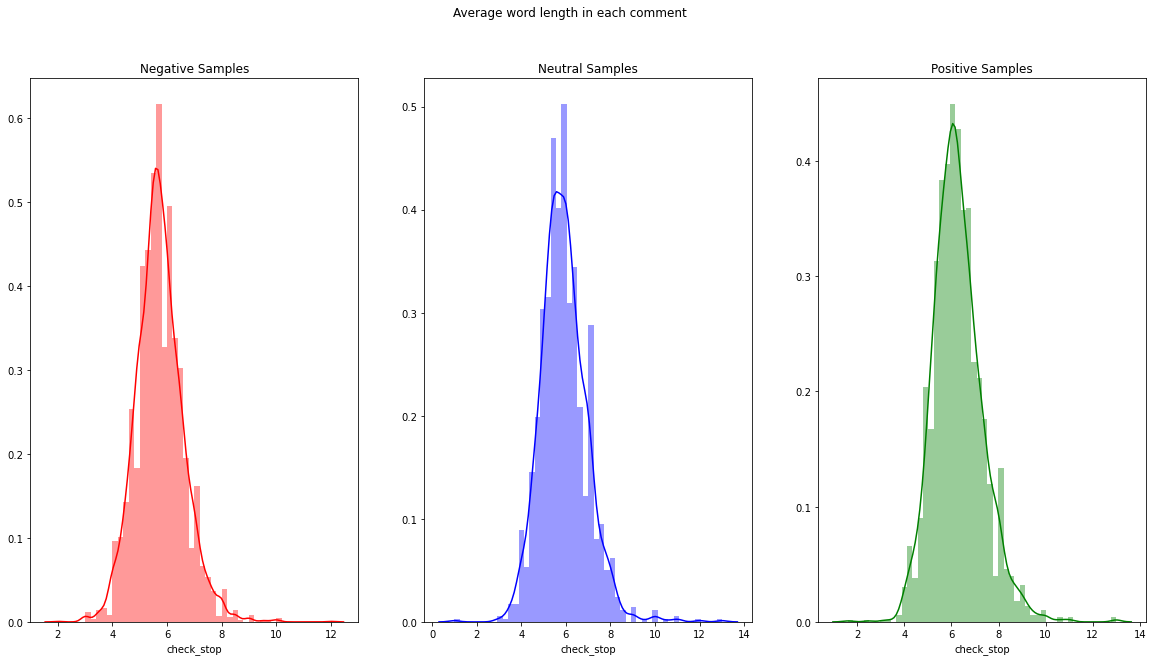

In [32]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))

word=df[df['sentiment']=='negative']['check_stop'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Negative Samples')

word=df[df['sentiment']=='neutral']['check_stop'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Neutral Samples')

word=df[df['sentiment']=='positive']['check_stop'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='green')
ax3.set_title('Positive Samples')

fig.suptitle('Average word length in each comment')

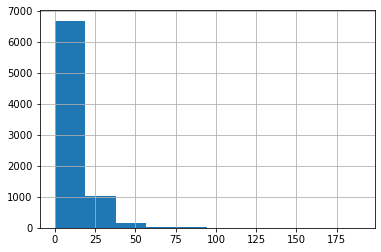

In [33]:
df['word_count'] = df['check_stop'].apply(lambda x: len(str(x).split(" ")))
df.check_stop.str.split().\
    map(lambda x: len(x)).\
    hist()

In [34]:
df.head()

date                                               text sentiment  \
0  20210221  #dsnr salam dato.. lebih kurang 15km dari ruma...  negative   
1  20210204  #noorhishamabdullah you’re not dr.fauci materi...  negative   
2  20210130  #share dan #like page #the_information_news un...   neutral   
3  20210202  1 dunia sedang & terus diperbodohkan dgn agend...  negative   
4  20210206  1 hari sy harap angka nie turun single digit m...  positive   

                                           processed  \
0  salam dato lebih kurang  km dari rumah ke kila...   
1  you re not dr fauci material you re just pn gr...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan dgn ...   
4  satu hari sy harap angka nie turun single digi...   

                                          normalized  \
0  salam dato lebih kurang km dari rumah ke kilan...   
1  you re not dr fauci material you re just pun g...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan deng...   
4  satu hari sy harap angka ini turun single digi...   

                                               check  \
0  salam dato lebih kurang kkm dari rumah ke kila...   
1  you re not dr fauci material you re just pun g...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan deng...   
4  satu hari sy harap angka ini turun single digi...   

                                          check_stop  word_count  
0  kurang kkm rumah kilang pkb pkpp kes pengurusa...          18  
1                        fauci material grabmart boy           4  
2  page khabar berita saudara patani selatan thai...           8  
3  dunia diperbodohkan agenda yahudi ekonomi duni...          15  
4  harap angka single digit capai zero case doaka...          11

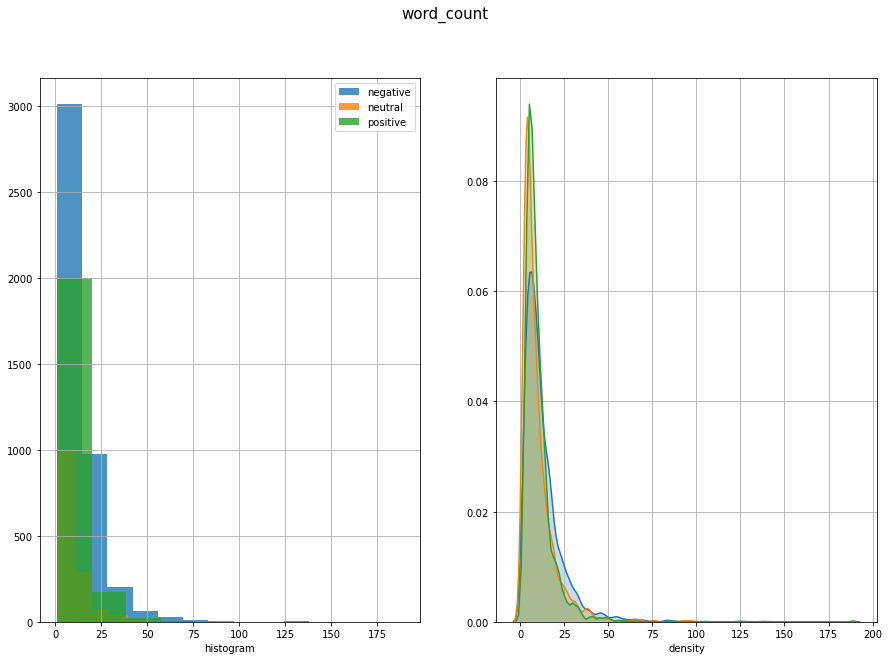

In [47]:
x, y = "word_count", "sentiment"
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle(x, fontsize=15)
for i in df[y].unique():
    sns.distplot(df[df[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(df[df[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(df[y].unique())
ax[1].grid(True)
plt.show()

we can conclude that KDE graph is histogram plot with Gaussian smooth function that enable us to observe the ranging value clearly. It shows that comments are usually have number of words ranging from 1 to 100. Hence, neural network model should at least accept comments up to 100 words.

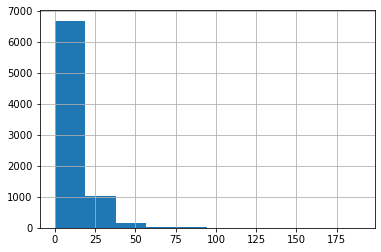

In [41]:
df = df.drop(columns=['word_count_b4'])
df['word_count_original_text'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.check_stop.str.split().\
    map(lambda x: len(x)).\
    hist()

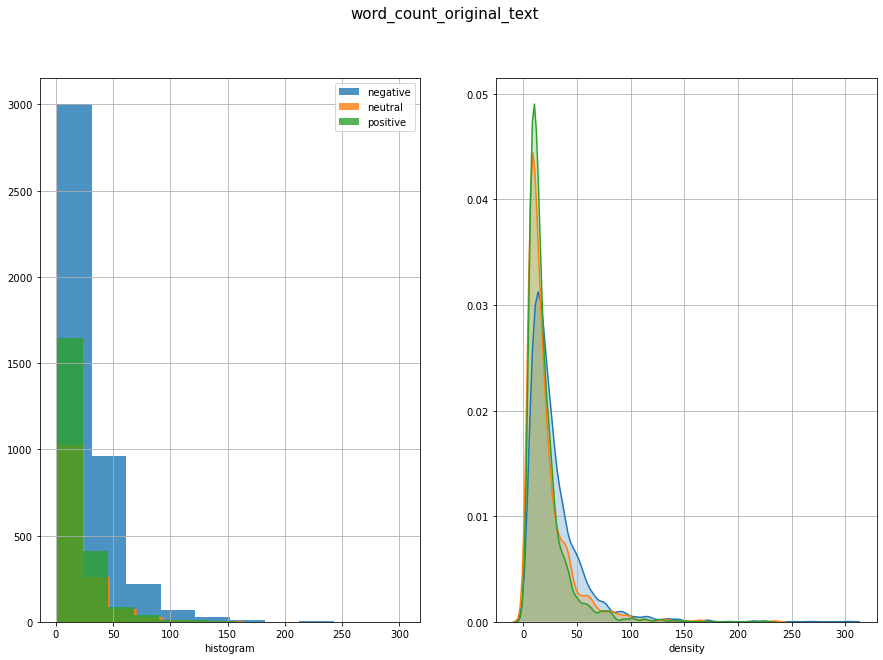

In [46]:
x, y = "word_count_original_text", "sentiment"
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
fig.suptitle(x, fontsize=15)
for i in df[y].unique():
    sns.distplot(df[df[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(df[df[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(df[y].unique())
ax[1].grid(True)
plt.show()